In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick

In [2]:
df = pd.read_excel("GRAFICOS.xlsx")

In [3]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,41,A,Z2,85,1995-01-01,1688,W1,10.000000
1,62,E,Z1,91,1995-02-01,1225,W2,10.200000
2,51,A,Z2,50,1995-03-01,1573,W1,10.404000
3,55,B,Z1,42,1995-04-01,1091,W2,10.612080
4,78,C,Z1,57,1995-05-01,1577,W1,10.824322


In [4]:
df.dtypes

X1             int64
X2            object
X3            object
X4             int64
X5    datetime64[ns]
X6             int64
X7            object
X8           float64
dtype: object

In [5]:
df['ano'] = pd.DatetimeIndex(df['X5']).year
df['mes'] = pd.DatetimeIndex(df['X5']).month

# Gráficos de Barra

### Barra simples

* Montando a tabela de frequência

In [6]:
count = df['X2'].value_counts()

In [7]:
freq = pd.DataFrame({'frequencia': count})

In [8]:
freq

,frequencia
E,20
A,17
G,13
F,12
C,11
B,11
D,9
H,7


* Gerando o gráfico 

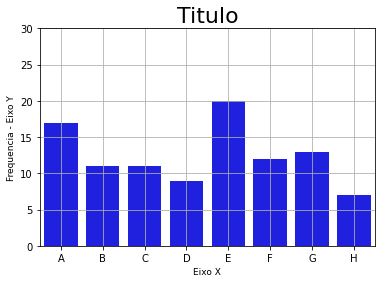

In [9]:
sns.barplot(
    x = freq.index,
    y = "frequencia",
    data=freq, 
    color='blue',
    order = ['A','B','C','D','E','F','G','H']); #podemos escolher a order das barras
plt.xlabel("Eixo X", fontsize = 9) #configurar titulo do eixo X
plt.ylabel("Frequencia - Eixo Y", fontsize = 9) #configurar titulo do eixo y
plt.title("Titulo", fontsize = 22) #configurar titulo do gráfico
plt.ylim((0,30)) #ajustar os limites do eixo y, neste caso, de 0 até 30
plt.grid(True) #linhas de eixo
plt.show()

### Barra empilhada

* Construindo a tabela de frequência

In [10]:
freq = pd.crosstab(df['X2'], df['X3'])
freq

X3,Z1,Z2,Z3
X2,,,
A,4,6,7
B,6,3,2
C,8,1,2
D,1,4,4
E,5,8,7
F,4,2,6
G,4,5,4
H,1,5,1


* Gerando o gráfico

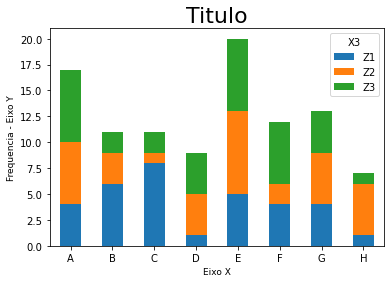

In [11]:
freq.plot.bar(stacked=True, rot=0)
plt.xlabel("Eixo X", fontsize = 9)
plt.ylabel("Frequencia - Eixo Y", fontsize = 9)
plt.title("Titulo", fontsize = 22)
plt.show()

### Barra empilhada percentual

* Gerando tabela de frequencia percentual pelas linhas

In [43]:
freq = pd.crosstab(df['X2'], df['X3'], normalize = 'index')*100
freq

X3,Z1,Z2,Z3
X2,,,
A,23.529412,35.294118,41.176471
B,54.545455,27.272727,18.181818
C,72.727273,9.090909,18.181818
D,11.111111,44.444444,44.444444
E,25.000000,40.000000,35.000000
F,33.333333,16.666667,50.000000
G,30.769231,38.461538,30.769231
H,14.285714,71.428571,14.285714


* Plotando o gráfico

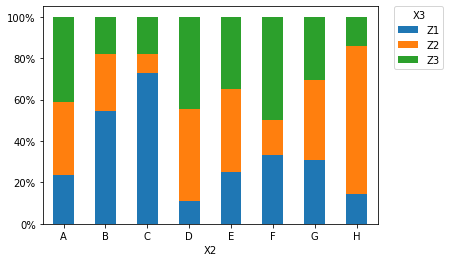

In [52]:
ax = freq.plot.bar(stacked=True, rot=0)
plt.legend(title = "X3", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #ajustando a legenda do gráfico, com titulo e dispondo esta fora do gráfico
ax.yaxis.set_major_formatter(mtick.PercentFormatter()) #colocando o eixo y em percentual

### Barras agrupadas

* Inicialmente gera-se uma tabela de frequência pelas variáveis que se deseja agrupar

In [14]:
freq = df.pivot_table('X1',index=["X2","X3","X7"],aggfunc='count').reset_index()
freq.rename(columns = {'X1': 'freq'}, inplace = True)

In [15]:
freq.head(10)

,X2,X3,X7,freq
0,A,Z1,W1,1
1,A,Z1,W2,3
2,A,Z2,W1,5
3,A,Z2,W2,1
4,A,Z3,W1,5
5,A,Z3,W2,2
6,B,Z1,W1,1
7,B,Z1,W2,5
8,B,Z2,W1,2
9,B,Z2,W2,1


* Plotando o gráfico

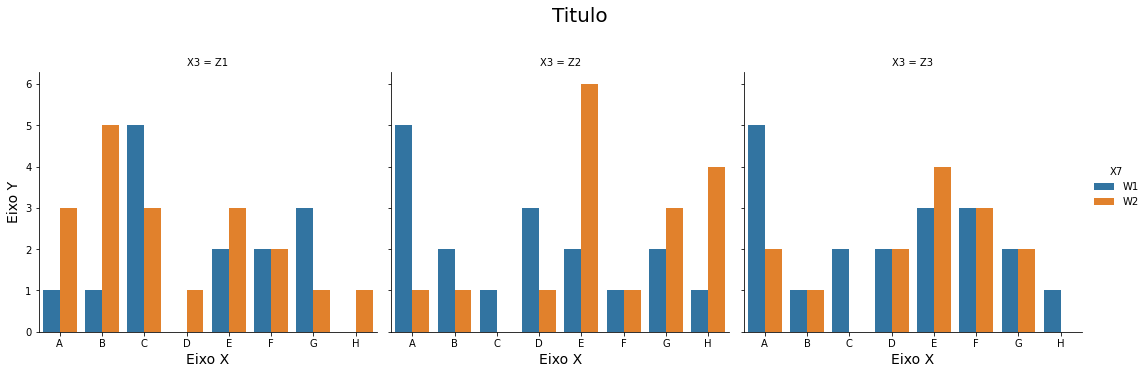

In [16]:
im = sns.catplot(x="X2", y="freq",
                 hue="X7", col="X3", #ajustando o agrupamento dentro de cada grafico individual ("hue")
                                     #ajustando o agrupamento entre os gráficos ("col")
                 data=freq, kind="bar")
im.fig.subplots_adjust(top=0.8)
im.fig.suptitle('Titulo', fontsize = 20)
im.set_xlabels("Eixo X", fontsize=14)
im.set_ylabels("Eixo Y", fontsize=14)
plt.show()

* Uma opção de personalização seria determinar o nome das variáveis no eixo X

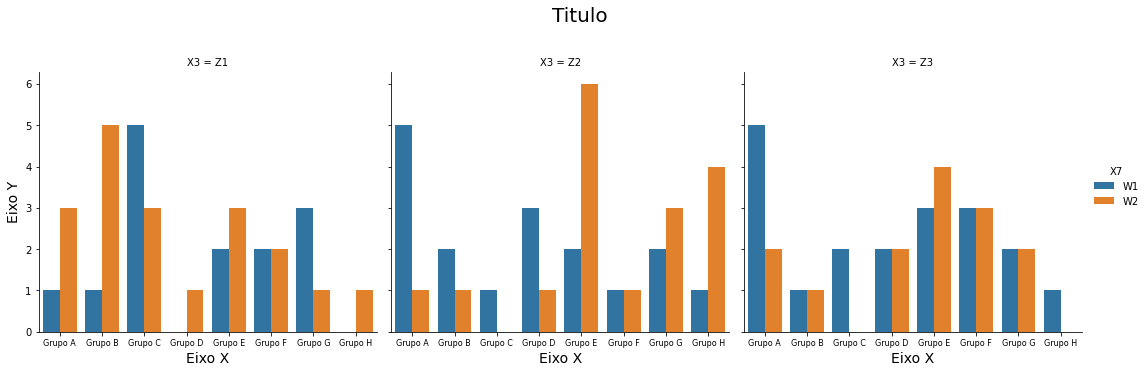

In [17]:
im = sns.catplot(x="X2", y="freq",
                 hue="X7", col="X3",
                 data=freq, kind="bar")
im.fig.subplots_adjust(top=0.8)
im.fig.suptitle('Titulo', fontsize = 20)
im.set_xlabels("Eixo X", fontsize=14)
im.set_ylabels("Eixo Y", fontsize=14)
im.set_xticklabels(('Grupo A','Grupo B','Grupo C','Grupo D','Grupo E','Grupo F','Grupo G','Grupo H'), fontsize=8) #personalizar o nome das variáveis no eixo X
plt.show()

# Boxplot

* Gerando boxplot agrupado

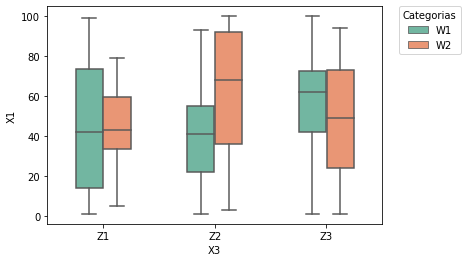

In [18]:
sns.boxplot(x="X3", y="X1", hue="X7", data=df, palette="Set2", width=0.5, order=['Z1','Z2','Z3'])
plt.legend(title ='Categorias', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

* Boxplot agrupado e segmentado em valores de uma variável

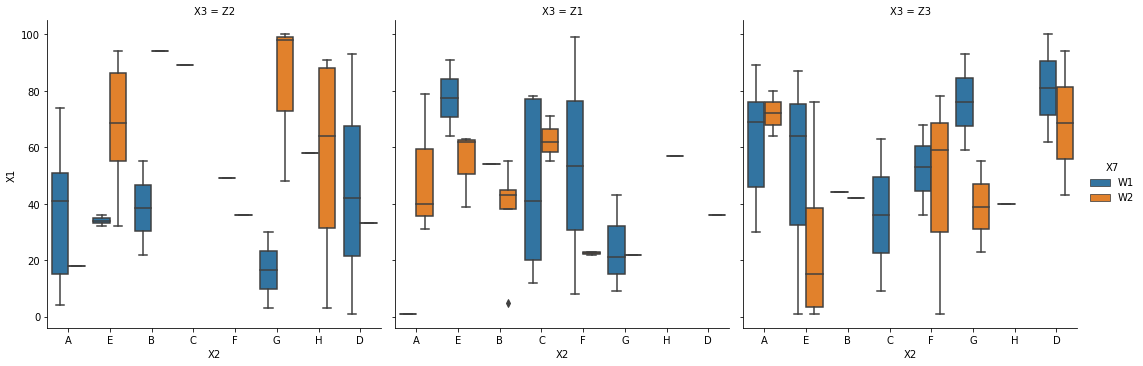

In [19]:
sns.catplot(x="X2", y="X1", hue="X7", col="X3", data=df, kind="box")

# Histograma

* Plotando histograma da variável com um boxplot acoplado

C:\Users\gcabr\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


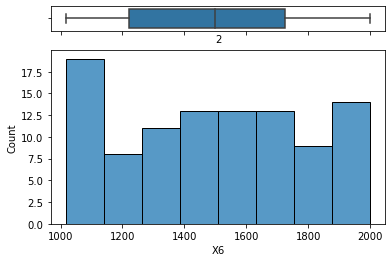

In [61]:
# ajustando a disposiçao dos dois graficos como subplots
# como são dois graficos dividindo o eixo X, ajustamos a proporcao de cada um deles pelo height_ratios
f, (ax_boxplot, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.7, 5)})
sns.boxplot(df["X6"], ax=ax_boxplot) #primeiro grafico, o boxplot
sns.histplot(data=df, x="X6", ax=ax_hist) #segundo grafico, o histograma
ax_boxplot.set(xlabel='')
plt.show()

* Histogramas sobrepostos de duas variáveis

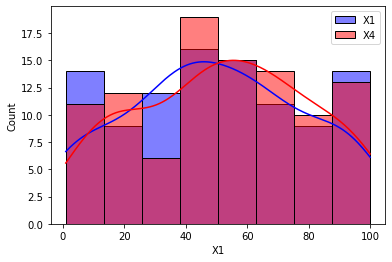

In [21]:
sns.histplot(data=df, x="X1", color="blue", label="X1", kde=True)
sns.histplot(data=df, x="X4", color="red", label="X4", kde=True)
plt.legend() 
plt.show()

# Dispersao

* Gráfico de dispersao entre duas variáveis, ajustando seus marcadores

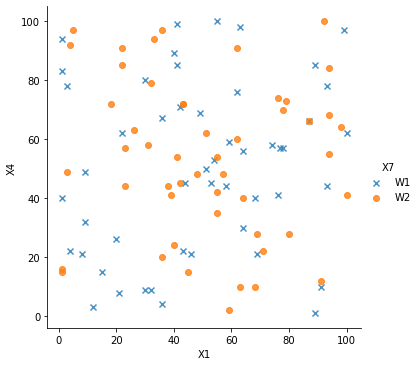

In [22]:
sns.lmplot( x="X1", y="X4", data=df, fit_reg=False,hue='X7', legend=True, markers = ['x','o'])
plt.show()

* Dispersao em complemento com frequencia em barras de cada variável

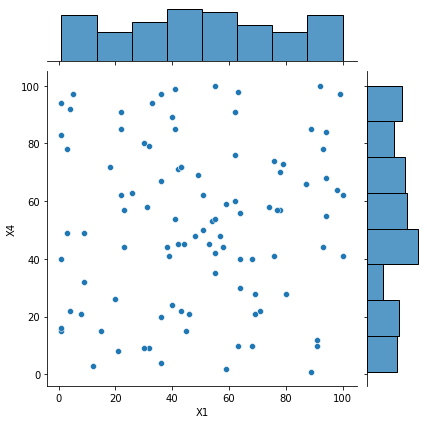

In [23]:
sns.jointplot(x=df["X1"], y=df["X4"], kind='scatter')
plt.show()

* Para casos em que há muitos pontos a serem visualizados, pode-se optar por um gráfico de calor para representar a dispersão e, neste caso, com o apoio de uma referência de uma curva de densidade para cada variável

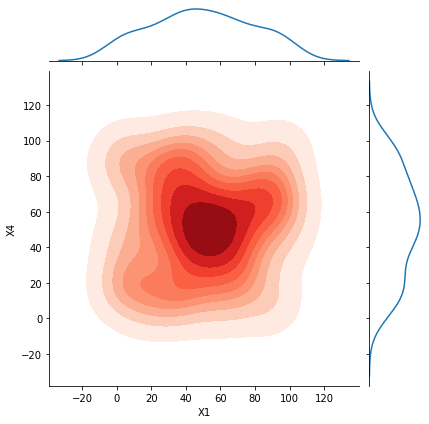

In [63]:
sns.jointplot(x=df['X1'], y=df['X4'], cmap="Reds", shade=True, kind='kde')
plt.show()

# Linha

* Plotagem simples de linha

<AxesSubplot:xlabel='X5', ylabel='X8'>

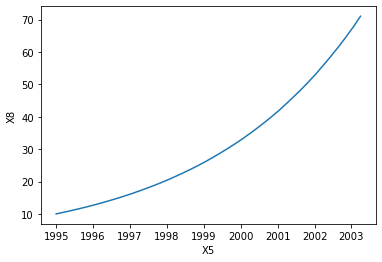

In [25]:
sns.lineplot(data=df, x="X5", y="X8")

* Construindo ano e mes de uma tabela com coluna de data

In [26]:
df['ano'] = pd.DatetimeIndex(df['X5']).year
df['mes'] = pd.DatetimeIndex(df['X5']).month

In [27]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,ano,mes
0,41,A,Z2,85,1995-01-01,1688,W1,10.000000,1995,1
1,62,E,Z1,91,1995-02-01,1225,W2,10.200000,1995,2
2,51,A,Z2,50,1995-03-01,1573,W1,10.404000,1995,3
3,55,B,Z1,42,1995-04-01,1091,W2,10.612080,1995,4
4,78,C,Z1,57,1995-05-01,1577,W1,10.824322,1995,5


* Gerando tabela de valores da variável X8 por mes e ano

In [28]:
pivot = df.pivot("ano", "mes", "X8")
pivot.head(20)

mes,1,2,3,4,5,6,7,8,9,10,11,12
ano,,,,,,,,,,,,
1995,10.000000,10.200000,10.404000,10.612080,10.824322,11.040808,11.261624,11.486857,11.716594,11.950926,12.189944,12.433743
1996,12.682418,12.936066,13.194788,13.458683,13.727857,14.002414,14.282462,14.568112,14.859474,15.156663,15.459797,15.768993
1997,16.084372,16.406060,16.734181,17.068865,17.410242,17.758447,18.113616,18.475888,18.845406,19.222314,19.606760,19.998896
1998,20.398873,20.806851,21.222988,21.647448,22.080397,22.522005,22.972445,23.431894,23.900531,24.378542,24.866113,25.363435
1999,25.870704,26.388118,26.915880,27.454198,28.003282,28.563347,29.134614,29.717307,30.311653,30.917886,31.536244,32.166969
2000,32.810308,33.466514,34.135844,34.818561,35.514932,36.225231,36.949736,37.688730,38.442505,39.211355,39.995582,40.795494
2001,41.611404,42.443632,43.292504,44.158355,45.041522,45.942352,46.861199,47.798423,48.754392,49.729479,50.724069,51.738550
2002,52.773321,53.828788,54.905364,56.003471,57.123540,58.266011,59.431331,60.619958,61.832357,63.069004,64.330384,65.616992
2003,66.929332,68.267918,69.633277,71.025942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Plotando a variável por ano e mês 

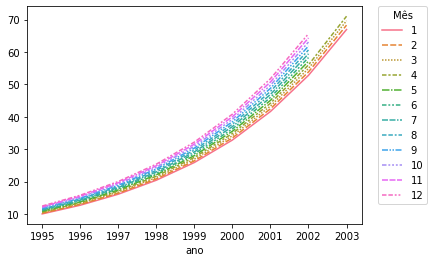

In [29]:
sns.lineplot(data=pivot)
plt.legend(title = "Mês", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [30]:
df2 = pd.read_excel("grafico2.xlsx")

In [31]:
df2.head(200)

,Data,X1,X2
0,1999-01-01,10,A
1,1999-02-01,15,A
2,1999-03-01,20,A
3,1999-04-01,25,A
4,1999-05-01,30,A
...,...,...,...
139,2004-08-01,375,B
140,2004-09-01,380,B
141,2004-10-01,385,B
142,2004-11-01,390,B


* Grafico de linha por duas variáveis 

<AxesSubplot:xlabel='Data', ylabel='X1'>

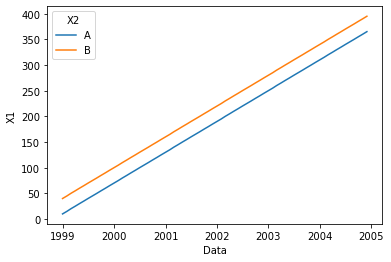

In [32]:
sns.lineplot(data=df2, x="Data", y="X1", hue="X2")

In [33]:
df2['ano'] = pd.DatetimeIndex(df2['Data']).year
df2['mes'] = pd.DatetimeIndex(df2['Data']).month

In [34]:
pivot = df2.pivot_table('X1',index=["ano","mes","X2"]).reset_index()

In [35]:
pivot

,ano,mes,X2,X1
0,1999,1,A,10
1,1999,1,B,40
2,1999,2,A,15
3,1999,2,B,45
4,1999,3,A,20
...,...,...,...,...
139,2004,10,B,385
140,2004,11,A,360
141,2004,11,B,390
142,2004,12,A,365


* Plotando as variáveis por ano e mês 

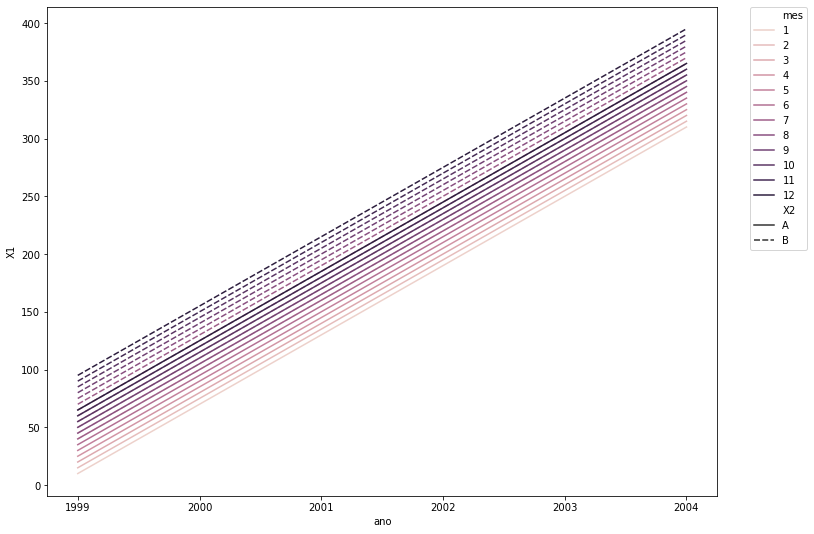

In [36]:
plt.figure(figsize=(12,9))
sns.lineplot(data=pivot, x="ano", y="X1", hue="mes", style="X2", legend = "full") #Por hue e style conseguimos agrupar as linhas por duas variáveis
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Área empilhada

In [37]:
df2.head()

,Data,X1,X2,ano,mes
0,1999-01-01,10,A,1999,1
1,1999-02-01,15,A,1999,2
2,1999-03-01,20,A,1999,3
3,1999-04-01,25,A,1999,4
4,1999-05-01,30,A,1999,5


* Agrupando a soma da variável X1 e calculando o % desta pela variável X2 ao longo das datas

In [38]:
freq = pd.crosstab(df2.Data, df2.X2, values=df2.X1, aggfunc='sum', normalize='index')
freq

X2,A,B
Data,,
1999-01-01,0.200000,0.800000
1999-02-01,0.250000,0.750000
1999-03-01,0.285714,0.714286
1999-04-01,0.312500,0.687500
1999-05-01,0.333333,0.666667
...,...,...
2004-08-01,0.479167,0.520833
2004-09-01,0.479452,0.520548
2004-10-01,0.479730,0.520270


* Plotando o gráfico de área empilhada

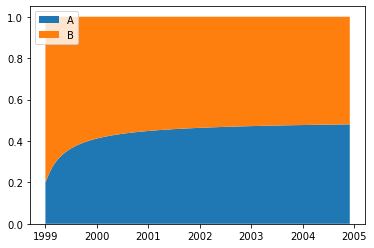

In [39]:
plt.stackplot(freq.index, freq['A'],freq['B'], labels=['A','B'])
plt.legend(loc='upper left')
plt.show()